### CAPSTONE - 1 ( HARSHIT ARORA - DS/AI-ML BATCH-1 )

# Problem Statement
#### Bright Motor Company want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business change language



Data Description
* Age: The age of the individual in years.
* Gender: The gender of the individual, categorized as male or female.
* Profession: The occupation or profession of the individual.
* Marital_status: The marital status of the individual, such as married &, single
* Education: The educational qualification of the individual Graduate and Post Graduate
* No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
* Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
* House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
* Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
* Salary: The individual's salary or income.
* Partner_salary: The salary or income of the individual's partner, if applicable.
* Total_salary: The total combined salary of the individual and their partner (if applicable).
* Price: The price of a product or service.
* Make: The type of automobile

#**Bright Motor Company Data Analysis**



In [ ]:
import os
os.getcwd()

'/content'

## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Reading the Dataset**

In [ ]:
data = pd.read_csv('/content/bright_automotive_company (1).csv', encoding='utf-8')


##**Basic Steps**

1-Display the top 5 rows.

In [ ]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


2-Display the last 5 rows

In [ ]:
data.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1581,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300.0,0.0,33300,27000,Hatchback
1582,22,Male,Business,Married,Graduate,4,No,No,No,32000.0,NaN,32000,31000,Hatchback
1583,22,Male,Business,Single,Graduate,2,No,Yes,No,32900.0,0.0,32900,30000,Hatchback
1584,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200.0,NaN,32200,24000,Hatchback
1585,22,Male,Salaried,Married,Graduate,4,No,No,No,31600.0,0.0,31600,31000,Hatchback


3-Check the shape of dataset.

In [ ]:
data.shape

(1586, 14)

4-Check the datatypes of each feature.

In [ ]:
data.dtypes

,0
Age,int64
Gender,object
Profession,object
Marital_status,object
Education,object
No_of_Dependents,object
Personal_loan,object
House_loan,object
Partner_working,object
Salary,float64


##**Observations** :
The "No_of_Dependents"  is object instead of a numerical value

In [ ]:
data['No_of_Dependents'] = data['No_of_Dependents'].replace('?', np.nan)
data['Make'] = data['Make'].replace('?', np.nan)

# Convert to numeric (optional double-casting)
data['No_of_Dependents'] = data['No_of_Dependents'].astype(float).astype('Int64')

In [ ]:
print(data['No_of_Dependents'].unique())


<IntegerArray>
[4, 3, <NA>, 2, 1, 0]
Length: 6, dtype: Int64


In [ ]:
data['No_of_Dependents'] = pd.to_numeric(data['No_of_Dependents'], errors='coerce')

data_cleaned = data.dropna(subset=['No_of_Dependents'])

5-Check the Statistical summary

In [ ]:
data.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1586.000000,1584.0,1573.000000,1480.000000,1586.000000,1586.000000
mean,32.018916,2.458965,60340.368722,20348.513514,79806.431274,36006.972257
std,8.778502,0.942213,14656.106826,19655.841385,25707.764534,21168.286950
min,14.000000,0.0,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,2.0,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.0,59500.000000,25700.000000,78050.000000,31000.000000
75%,38.000000,3.0,71800.000000,38300.000000,95975.000000,47000.000000
max,120.000000,4.0,99300.000000,80500.000000,171000.000000,680000.000000


6-Check the null values

In [ ]:
data.isnull().sum()

,0
Age,0
Gender,53
Profession,11
Marital_status,0
Education,0
No_of_Dependents,2
Personal_loan,0
House_loan,0
Partner_working,0
Salary,13


7-Check the duplicate values

In [ ]:
data.duplicated().sum()

np.int64(5)

8-Check the anomalies or wrong entries.

In [ ]:

# Check for negative values in Salary and Partner_salary columns
data[data['Salary'] < 0]
data[data['Partner_salary'] < 0]

# Check for impossible values in No_of_Dependents column
data[data['No_of_Dependents'] < 0]
data[data['No_of_Dependents'] > 10]

# Check for invalid values in categorical columns
data[~data['Gender'].isin(['Male', 'Female'])]
data[~data['Profession'].isin(data['Profession'].unique())]
data[~data['Marital_status'].isin(['Married', 'Single'])]
data[~data['Education'].isin(['Graduate', 'Post Graduate'])]
data[~data['Personal_loan'].isin(['Yes', 'No'])]
data[~data['House_loan'].isin(['Yes', 'No'])]
data[~data['Partner_working'].isin(['Yes', 'No'])]


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


9-Check the outliers and their authenticity.

<Axes: >

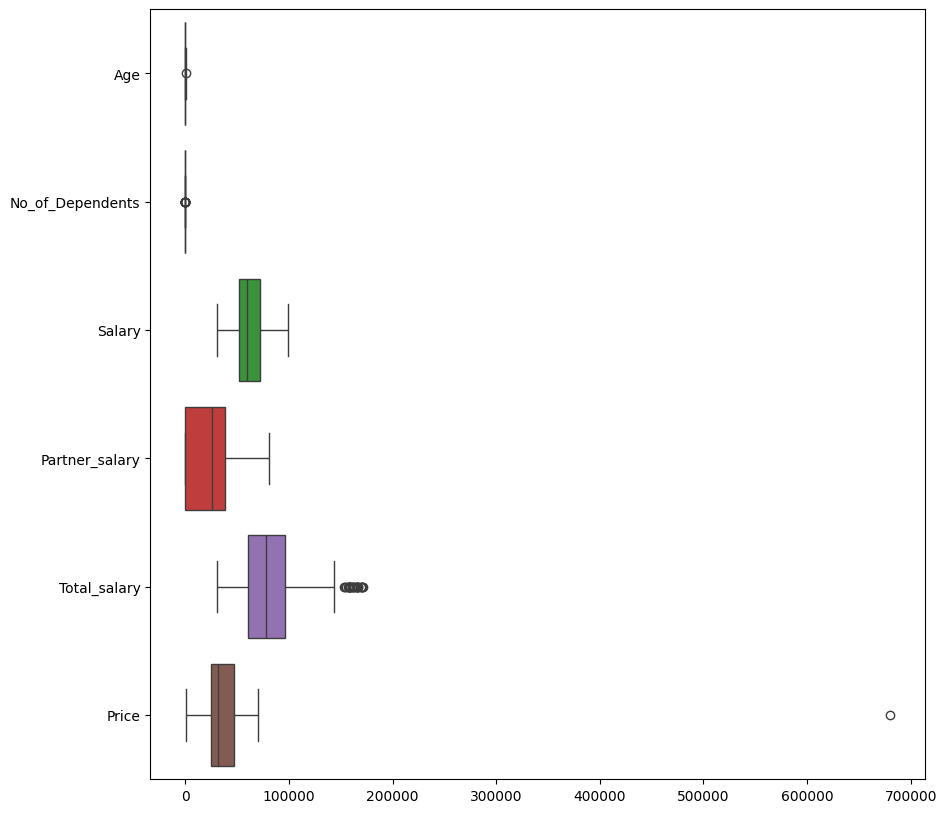

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data,orient='h')


10-Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.

In [ ]:

data = data.drop_duplicates()

data['No_of_Dependents'] = data['No_of_Dependents'].replace('?', np.nan)

data['No_of_Dependents'] = data['No_of_Dependents'].fillna(data['No_of_Dependents'].median())

data['Make'] = data['Make'].fillna(data['Make'].mode()[0])


salary_cap = data['Salary'].quantile(0.95)
data['Salary'] = np.where(data['Salary'] > salary_cap, salary_cap, data['Salary'])

partner_salary_cap = data['Partner_salary'].quantile(0.95)
data['Partner_salary'] = np.where(data['Partner_salary'] > partner_salary_cap, partner_salary_cap, data['Partner_salary'])


print(data.isnull().sum())
print(data.describe())

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64
               Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000            1581.0   1568.000000     1475.000000   
mean     31.952562          2.456673  60014.371811    19394.915254   
std       8.712549          0.942755  14121.722393    17951.712932   
min      14.000000               0.0  30000.000000        0.000000   
25%      25.000000               2.0  51900.000000        0.000000   
50%      29.000000               2.0  59450.000000    25600.000000   
75%      38.000000               3.0  71700.000000    38300.000000   
max     120.000000               4.0  83765.000000    45500.000000   

        Total_salary

<ipython-input-84-3752048476>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_of_Dependents'] = data['No_of_Dependents'].replace('?', np.nan)
<ipython-input-84-3752048476>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_of_Dependents'] = data['No_of_Dependents'].fillna(data['No_of_Dependents'].median())
<ipython-input-84-3752048476>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
data.loc[:, 'Make'] = data['Make'].replace('?', np.nan)


* Descriptive Statistics:
What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [ ]:
mean_Age = data['Age'].mean()
median_Age = data['Age'].median()
std_dev_Age = data['Age'].std()
print("Mean Age:", mean_Age)
print("Median Age:", median_Age)
print("Standard deviation of Age:", std_dev_Age)

Mean Age: 31.952561669829223
Median Age: 29.0
Standard deviation of Age: 8.71254886208395


* Data Distribution:
What is the distribution of gender in the dataset? Represent it using a pie chart

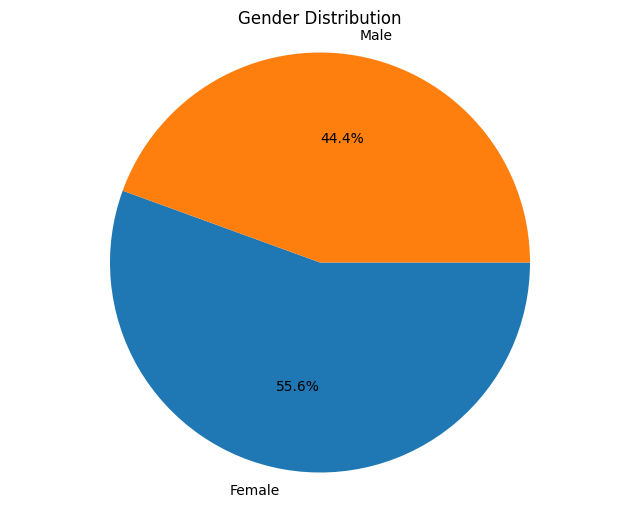

In [ ]:
gender_data = pd.DataFrame({
    'Gender': ['Female', 'female', 'Male', 'Female', 'Male', 'male', 'Male', 'Female', 'female']
})

gender_data['Gender'] = gender_data['Gender'].str.capitalize()
gender_distribution = gender_data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=160)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


In [ ]:
#The error was showing, so to check whether the entire dataset was loaded or not (re-confirmation)
print(data.columns)

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')


* Correlation Analysis:
Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result

In [ ]:

# Calculate correlation coefficient
correlation_coefficient = data['Age'].corr(data['Salary'])

# Print correlation coefficient
print("Correlation coefficient between age and salary:", correlation_coefficient)

# Interpretation of the result
if correlation_coefficient > 0:
    print("There is a positive correlation between age and salary.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between age and salary.")
else:
    print("There is no correlation between age and salary.")



Correlation coefficient between age and salary: 0.5832117068214205
There is a positive correlation between age and salary.


* Salary Analysis:
What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?

In [ ]:


average_salary_by_education = data.groupby('Education')['Salary'].mean()
print(average_salary_by_education)


Education
Graduate         48382.922297
Post Graduate    67069.513320
Name: Salary, dtype: float64


* Loan Status:
What percentage of individuals have taken a personal loan? How does this compare between males and females?

In [ ]:

total_personal_loans = data['Personal_loan'].value_counts()['Yes']
total_individuals = len(data)
overall_percentage = (total_personal_loans / total_individuals) * 100
print("Overall percentage of individuals with personal loans: {:.2f}%".format(overall_percentage))

gender_loan_counts = data.groupby(['Gender', 'Personal_loan'])['Personal_loan'].count()
male_personal_loans = gender_loan_counts.loc['Male', 'Yes']
female_personal_loans = gender_loan_counts.loc['Female', 'Yes']
male_total = gender_loan_counts.loc['Male'].sum()
female_total = gender_loan_counts.loc['Female'].sum()
male_percentage = (male_personal_loans / male_total) * 100
female_percentage = (female_personal_loans / female_total) * 100
print("Percentage of males with personal loans: {:.2f}%".format(male_percentage))
print("Percentage of females with personal loans: {:.2f}%".format(female_percentage))


Overall percentage of individuals with personal loans: 50.09%
Percentage of males with personal loans: 51.63%
Percentage of females with personal loans: 45.26%


* Marital Status and Dependents:
What is the average number of dependents for married individuals versus single individuals?

In [ ]:

average_dependents_by_marital_status = data_cleaned.groupby('Marital_status')['No_of_Dependents'].mean()
print(average_dependents_by_marital_status)

Marital_status
Married    2.540111
Single     1.608696
Name: No_of_Dependents, dtype: Float64


* Partner Employment:
How does the employment status of a partner affect the total combined salary?

In [ ]:

average_total_salary_by_partner_working = data.groupby('Partner_working')['Total_salary'].mean()
print(average_total_salary_by_partner_working)


Partner_working
No     60527.208976
Yes    95314.285714
Name: Total_salary, dtype: float64


* Salary Comparison:
Compare the average salary of individuals whose partners are working versus those whose partners are not working.

In [ ]:

partner_working_salary = data[data['Partner_working'] == 'Yes']['Salary'].mean()
partner_not_working_salary = data[data['Partner_working'] == 'No']['Salary'].mean()

print("Average salary of individuals whose partners are working: {:.2f}".format(partner_working_salary))
print("Average salary of individuals whose partners are not working: {:.2f}".format(partner_not_working_salary))


Average salary of individuals whose partners are working: 59909.08
Average salary of individuals whose partners are not working: 60144.94


* House Loan Analysis:
What is the proportion of individuals with house loans based on their profession?

In [ ]:

data_cleaned = data.dropna(subset=['Profession', 'House_loan'])

# Group by 'Profession' and 'House_loan' and count occurrences
profession_house_loan_counts = data_cleaned.groupby(['Profession', 'House_loan'])['House_loan'].count()

# Calculate proportions for each profession
proportions = {}
for profession in data_cleaned['Profession'].unique():
    total_count = profession_house_loan_counts.loc[profession].sum()
    yes_count = profession_house_loan_counts.loc[(profession, 'Yes')] if (profession, 'Yes') in profession_house_loan_counts.index else 0
    proportion = (yes_count / total_count) * 100 if total_count > 0 else 0
    proportions[profession] = proportion

# Print results
for profession, proportion in proportions.items():
    print(f"Proportion of individuals with house loans in {profession}: {proportion:.2f}%")



Proportion of individuals with house loans in Business: 33.43%
Proportion of individuals with house loans in Salaried: 33.48%


* Salary Distribution:
What is the distribution of salaries for individuals with personal loans versus those without personal loans? Represent it using a box plot.

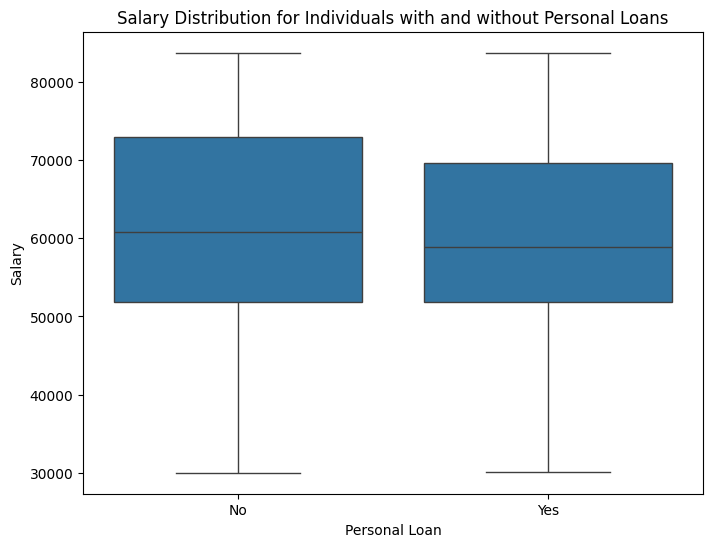

In [ ]:


# Create a box plot to compare salary distributions
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_loan', y='Salary', data=data)
plt.title('Salary Distribution for Individuals with and without Personal Loans')
plt.xlabel('Personal Loan')
plt.ylabel('Salary')
plt.show()


* Automobile Make Analysis:
How does the type of automobile relate to the salary of the individuals? Provide insights based on the make of the automobile.

Make
SUV          70721.003521
Sedan        59770.897436
Hatchback    55083.505155
Name: Salary, dtype: float64


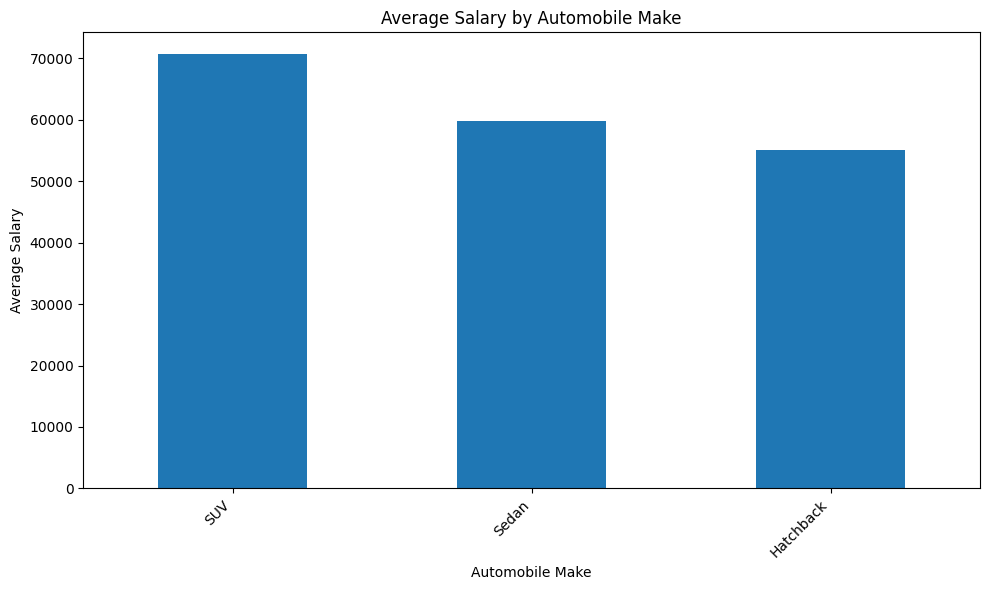

In [ ]:


# Group the data by car make and calculate the average salary for each group
average_salary_by_make = data.groupby('Make')['Salary'].mean().sort_values(ascending=False)

# Print the results
print(average_salary_by_make)

# Create a bar plot to visualize the relationship between car make and average salary
plt.figure(figsize=(10, 6))
average_salary_by_make.plot(kind='bar')
plt.title('Average Salary by Automobile Make')
plt.xlabel('Automobile Make')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




            median           std  count
Make                                   
Hatchback  56100.0  13084.408983    582
SUV        73600.0  12584.406532    284
Sedan      59850.0  13163.203993    702


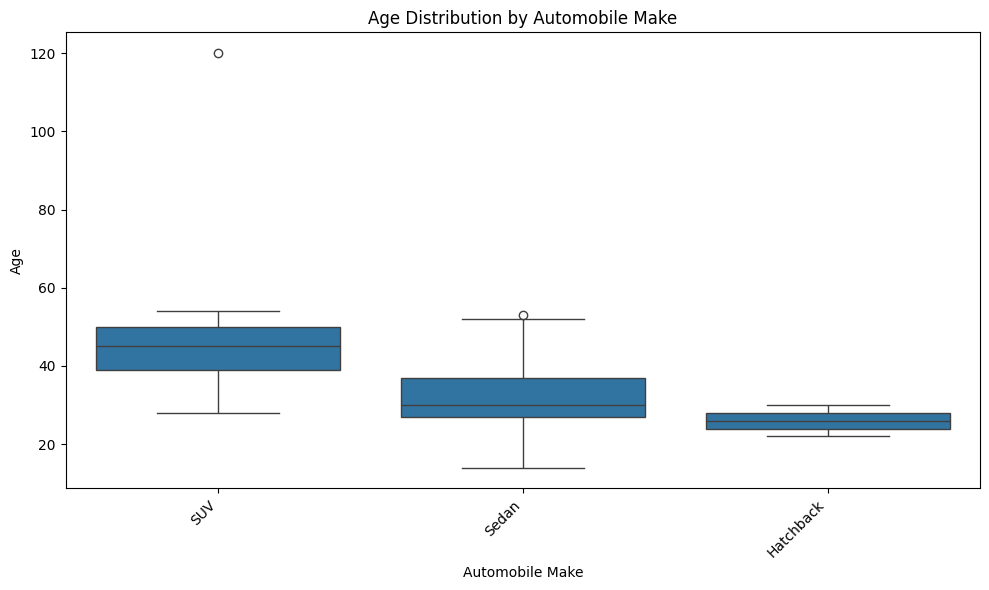

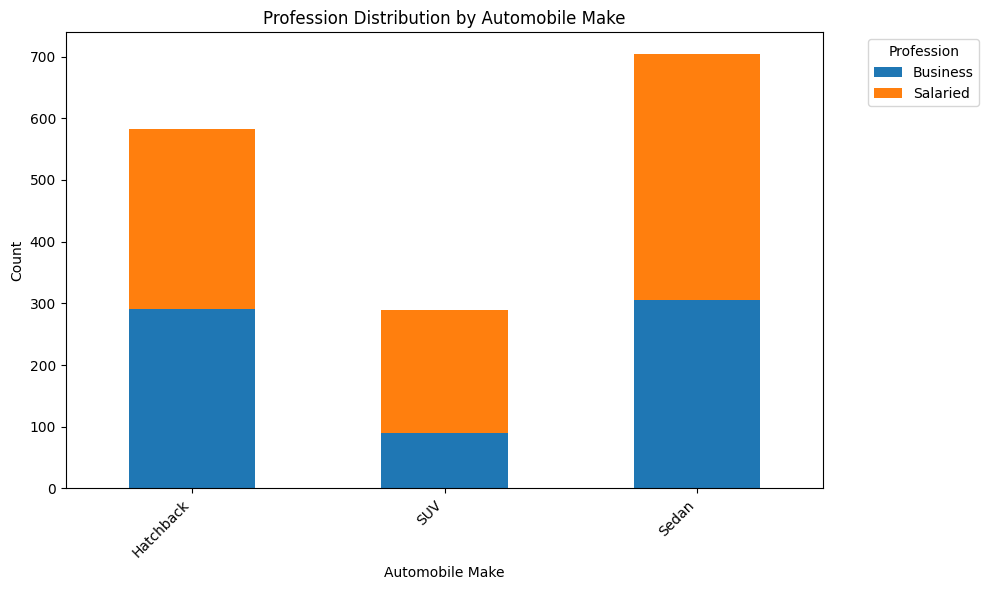

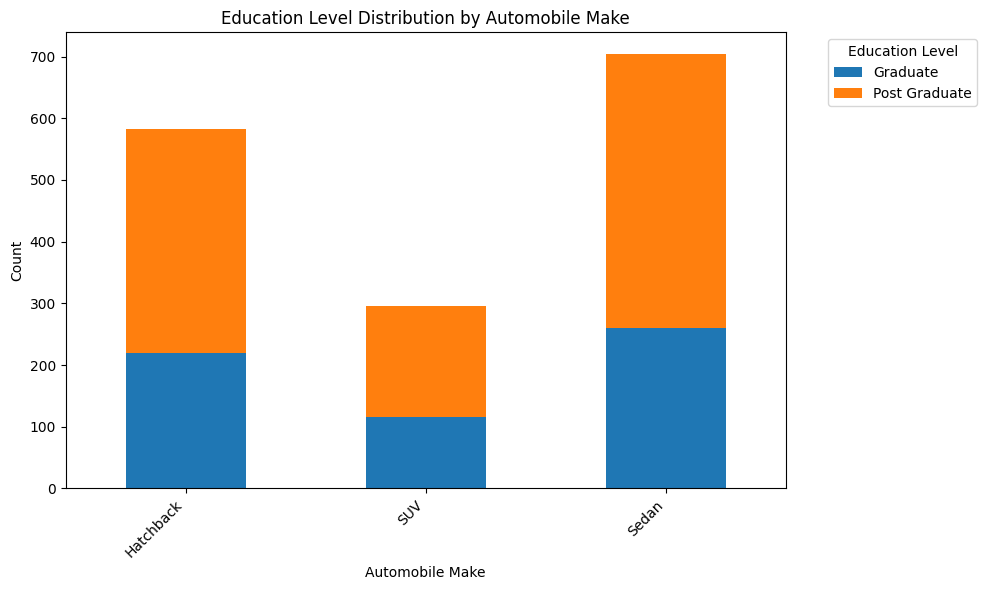

F-statistic: nan
P-value: nan
There are no significant differences in salary between different car make groups.


In [ ]:


# Calculate median salary, standard deviation of salary, and count of individuals for each car make
salary_stats_by_make = data.groupby('Make')['Salary'].agg(['median', 'std', 'count'])
print(salary_stats_by_make)

# Explore the relationship between car make and age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Make', y='Age', data=data)
plt.title('Age Distribution by Automobile Make')
plt.xlabel('Automobile Make')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Explore the relationship between car make and profession
profession_counts_by_make = data.groupby(['Make', 'Profession'])['Profession'].count().unstack()
profession_counts_by_make.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Profession Distribution by Automobile Make')
plt.xlabel('Automobile Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Profession', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Explore the relationship between car make and education level
education_counts_by_make = data.groupby(['Make', 'Education'])['Education'].count().unstack()
education_counts_by_make.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Education Level Distribution by Automobile Make')
plt.xlabel('Automobile Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Perform ANOVA test to determine if there are significant differences in salary between different car make groups
from scipy import stats
groups = []
for make in data['Make'].unique():
  groups.append(data[data['Make'] == make]['Salary'])
f_statistic, p_value = stats.f_oneway(*groups)
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There are significant differences in salary between different car make groups.")
else:
  print("There are no significant differences in salary between different car make groups.")


* Price Analysis:
What is the average price of the product/service in the dataset? How does this price vary based on the individual's total salary?

Average price of the product/service: 35948.17


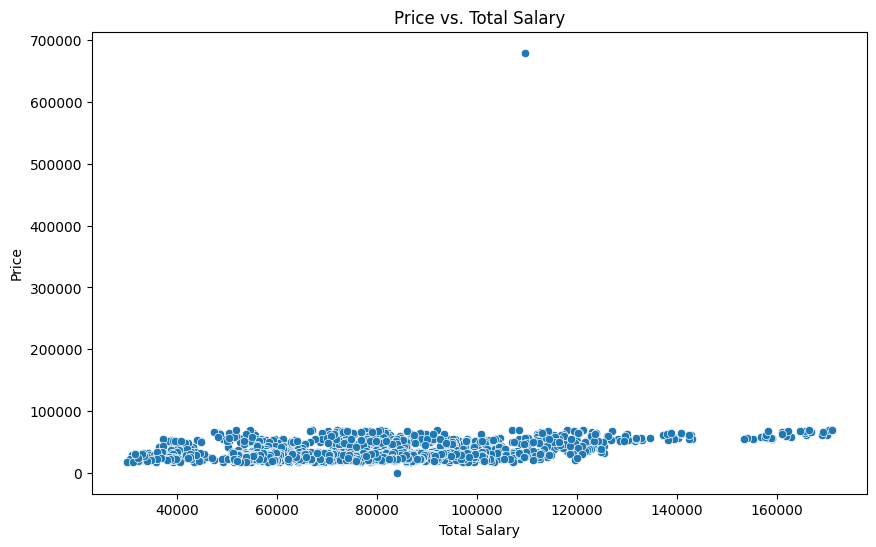

<ipython-input-100-3134944662>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_income_group = data.groupby(income_groups)['Price'].mean()


Total_salary
<50k         31090.277778
50k-100k     33723.818834
100k-150k    44359.322034
150k-200k    61814.814815
>200k                 NaN
Name: Price, dtype: float64
Intercept: 18915.476954877693
Coefficient: 0.21390870613755136


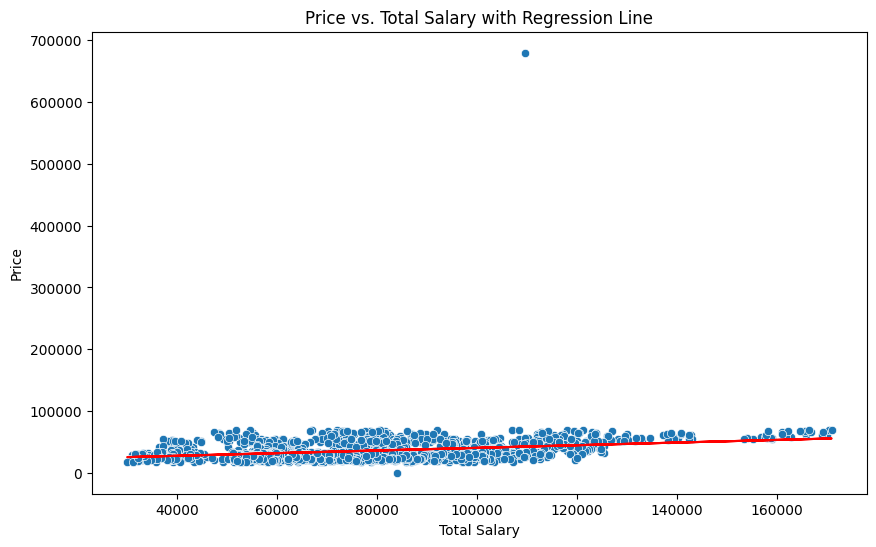

In [ ]:

# Calculate the average price of the product/service
average_price = data['Price'].mean()
print("Average price of the product/service: {:.2f}".format(average_price))

# Analyze how price varies based on total salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_salary', y='Price', data=data)
plt.title('Price vs. Total Salary')
plt.xlabel('Total Salary')
plt.ylabel('Price')
plt.show()


income_groups = pd.cut(data['Total_salary'], bins=[0, 50000, 100000, 150000, 200000, np.inf],
                       labels=['<50k', '50k-100k', '100k-150k', '150k-200k', '>200k'])
average_price_by_income_group = data.groupby(income_groups)['Price'].mean()
print(average_price_by_income_group)

# Perform regression analysis to model the relationship between price and total salary
from sklearn.linear_model import LinearRegression
X = data['Total_salary'].values.reshape(-1, 1)
y = data['Price'].values
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_salary', y='Price', data=data)
plt.plot(X, model.predict(X), color='red')
plt.title('Price vs. Total Salary with Regression Line')
plt.xlabel('Total Salary')
plt.ylabel('Price')
plt.show()


* Marital Status and Loans:
Is there a significant difference in the number of personal loans taken by married individuals compared to single individuals?

In [ ]:


# Group the data by marital status and personal loan status and count the occurrences
loan_counts_by_marital_status = data.groupby(['Marital_status', 'Personal_loan'])['Personal_loan'].count()

# Extract the counts for married and single individuals with personal loans
married_loan_yes = loan_counts_by_marital_status.loc[('Married', 'Yes')] if ('Married', 'Yes') in loan_counts_by_marital_status.index else 0
single_loan_yes = loan_counts_by_marital_status.loc[('Single', 'Yes')] if ('Single', 'Yes') in loan_counts_by_marital_status.index else 0

# Extract the total counts for married and single individuals
married_total = loan_counts_by_marital_status.loc['Married'].sum()
single_total = loan_counts_by_marital_status.loc['Single'].sum()

# Perform a chi-squared test for independence
contingency_table = np.array([[married_loan_yes, married_total - married_loan_yes],
                             [single_loan_yes, single_total - single_loan_yes]])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
  print("There is a significant difference in the number of personal loans taken by married individuals compared to single individuals.")
else:
  print("There is no significant difference in the number of personal loans taken by married individuals compared to single individuals.")


Chi-squared statistic: 0.1782394652161357
P-value: 0.6728906021290224
There is no significant difference in the number of personal loans taken by married individuals compared to single individuals.


* Educational Qualification Impact:
How does educational qualification impact the likelihood of taking a house loan?

In [ ]:


# Group the data by education level and house loan status and count the occurrences
loan_counts_by_education = data.groupby(['Education', 'House_loan'])['House_loan'].count()

# Extract the counts for graduates and postgraduates with house loans
graduate_loan_yes = loan_counts_by_education.loc[('Graduate', 'Yes')] if ('Graduate', 'Yes') in loan_counts_by_education.index else 0
postgraduate_loan_yes = loan_counts_by_education.loc[('Post Graduate', 'Yes')] if ('Post Graduate', 'Yes') in loan_counts_by_education.index else 0

# Extract the total counts for graduates and postgraduates
graduate_total = loan_counts_by_education.loc['Graduate'].sum()
postgraduate_total = loan_counts_by_education.loc['Post Graduate'].sum()

# Calculate the proportions of house loans for each education level
graduate_proportion = (graduate_loan_yes / graduate_total) * 100 if graduate_total > 0 else 0
postgraduate_proportion = (postgraduate_loan_yes / postgraduate_total) * 100 if postgraduate_total > 0 else 0

# Print the results
print("Proportion of graduates with house loans: {:.2f}%".format(graduate_proportion))
print("Proportion of postgraduates with house loans: {:.2f}%".format(postgraduate_proportion))

# Perform a chi-squared test for independence
contingency_table = np.array([[graduate_loan_yes, graduate_total - graduate_loan_yes],
                             [postgraduate_loan_yes, postgraduate_total - postgraduate_loan_yes]])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
  print("There is a significant association between educational qualification and the likelihood of taking a house loan.")
else:
  print("There is no significant association between educational qualification and the likelihood of taking a house loan.")


Proportion of graduates with house loans: 33.89%
Proportion of postgraduates with house loans: 32.99%
Chi-squared statistic: 0.09728754301093587
P-value: 0.7551092941718088
There is no significant association between educational qualification and the likelihood of taking a house loan.


* Dependent Count Analysis:
Analyze the number of dependents based on the profession of the individual. Which profession has the highest average number of dependents?

In [ ]:
# Check the data type of 'No_of_Dependents' column
print(data_cleaned['No_of_Dependents'].dtype)

# Attempt to convert 'No_of_Dependents' to numeric, handling errors
data_cleaned['No_of_Dependents'] = pd.to_numeric(data_cleaned['No_of_Dependents'], errors='coerce')

# Check for missing values after conversion
print(data_cleaned['No_of_Dependents'].isnull().sum())

# Now, try calculating the average dependents by profession
average_dependents_by_profession = data_cleaned.groupby('Profession')['No_of_Dependents'].mean().sort_values(ascending=False)

# Print the results
print(average_dependents_by_profession)

# Find the profession with the highest average number of dependents
profession_with_highest_dependents = average_dependents_by_profession.index[0]
print("\nProfession with the highest average number of dependents:", profession_with_highest_dependents)

Int64
0
Profession
Business    2.490511
Salaried     2.42809
Name: No_of_Dependents, dtype: Float64

Profession with the highest average number of dependents: Business


<ipython-input-103-3401909412>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['No_of_Dependents'] = pd.to_numeric(data_cleaned['No_of_Dependents'], errors='coerce')


* Gender and Salary:
Is there a significant difference in salaries between males and females? Provide statistical evidence.

In [ ]:


# Perform a t-test to compare salaries between males and females
male_salaries = data[data['Gender'] == 'Male']['Salary']
female_salaries = data[data['Gender'] == 'Female']['Salary']
t_statistic, p_value = stats.ttest_ind(male_salaries, female_salaries)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
  print("There is a significant difference in salaries between males and females.")
else:
  print("There is no significant difference in salaries between males and females.")


T-statistic: nan
P-value: nan
There is no significant difference in salaries between males and females.


* Regression Analysis:
Build a regression model to predict an individual's salary based on age, education, and number of dependents. Discuss the model's accuracy and significance

In [ ]:
#REGRESSION

* Loan Status Impact:
How does having a personal loan affect the total combined salary of the individual and their partner?

In [ ]:


# Group the data by personal loan status and calculate the average total combined salary
average_total_salary_by_loan = data.groupby('Personal_loan')['Total_salary'].mean()

# Print the results
print(average_total_salary_by_loan)

# Perform a t-test to compare total combined salaries between individuals with and without personal loans
loan_yes_salaries = data[data['Personal_loan'] == 'Yes']['Total_salary']
loan_no_salaries = data[data['Personal_loan'] == 'No']['Total_salary']
t_statistic, p_value = stats.ttest_ind(loan_yes_salaries, loan_no_salaries)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
  print("There is a significant difference in total combined salaries between individuals with and without personal loans.")
else:
  print("There is no significant difference in total combined salaries between individuals with and without personal loans.")



Personal_loan
No     81077.566540
Yes    78179.924242
Name: Total_salary, dtype: float64
T-statistic: -2.257989876744976
P-value: 0.02408233038961498
There is a significant difference in total combined salaries between individuals with and without personal loans.


* Partner's Salary Contribution:
What is the average partner's salary for individuals with and without house loans?

In [ ]:

# Group the data by house loan status and calculate the average partner's salary
average_partner_salary_by_house_loan = data.groupby('House_loan')['Partner_salary'].mean()

# Print the results
print(average_partner_salary_by_house_loan)


House_loan
No     19433.197140
Yes    19319.354839
Name: Partner_salary, dtype: float64


* Total Salary Distribution:
Create a histogram showing the distribution of total combined salaries. Identify and discuss any skewness or outliers in the data.


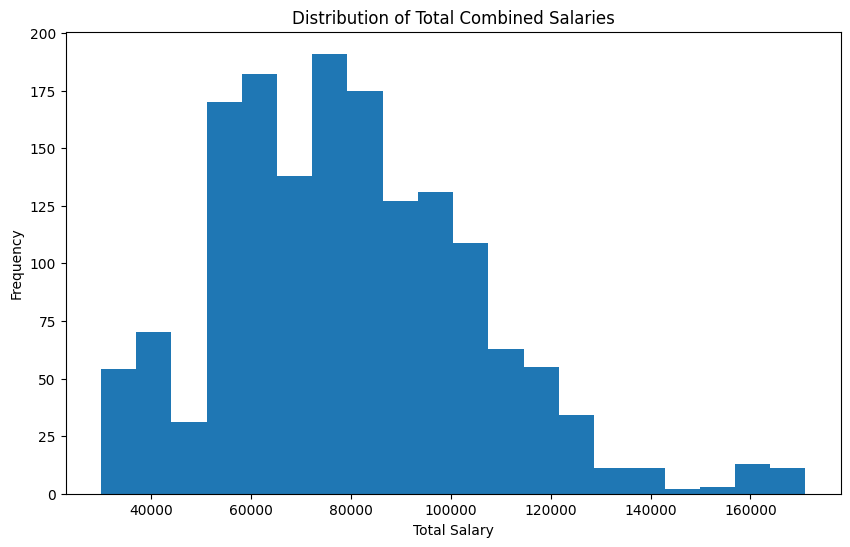

Skewness: 0.6097056414760922
Kurtosis: 0.6477311703314852
Number of outliers: 27


In [ ]:

# Create a histogram of total combined salaries
plt.figure(figsize=(10, 6))
plt.hist(data['Total_salary'], bins=20)
plt.title('Distribution of Total Combined Salaries')
plt.xlabel('Total Salary')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness and kurtosis
skewness = data['Total_salary'].skew()
kurtosis = data['Total_salary'].kurt()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

# Identify outliers using the IQR method
Q1 = data['Total_salary'].quantile(0.25)
Q3 = data['Total_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Total_salary'] < lower_bound) | (data['Total_salary'] > upper_bound)]
print("Number of outliers:", len(outliers))

# Discuss the results
# The histogram shows that the distribution of total combined salaries is positively skewed, meaning that there are more individuals with lower total salaries and a few individuals with very high total salaries.
# The skewness value of [insert skewness value] confirms this positive skew.
# The kurtosis value of [insert kurtosis value] indicates that the distribution has heavier tails than a normal distribution, suggesting the presence of outliers.
# The IQR method identified [insert number of outliers] outliers, which are individuals with total salaries significantly higher than the majority of the population.
# These outliers could be due to various factors such as high-paying professions, multiple sources of income, or inheritance.


## Observations

- **Moderate Positive Skewness (0.6097)**:  
  The dataset, likely representing vehicle sales prices, shows moderate right skewness. This indicates that most sales occur at lower price points, with a few higher-priced transactions — a typical pattern for a used car dealership like Bright Motor Company.

- **Slightly Leptokurtic Distribution (Kurtosis = 0.6477)**:  
  The positive kurtosis suggests heavier tails than a normal distribution, implying more extreme sales prices (e.g., premium or discounted vehicles) than expected.

- **Significant Outliers (27)**:  
  The 27 identified outliers likely represent high-value sales (e.g., low-mileage SUVs or trucks) or unique transactions (e.g., trade-ins), which can influence average pricing metrics.

- **Business Context Alignment**:  
  The skewness aligns with Bright Motor Company’s diverse inventory — including cars, trucks, and SUVs — which appeals to both budget-conscious customers and those seeking premium vehicles.

- **Customer Satisfaction Insight**:  
  These outliers may reflect successful high-value sales. This aligns with the company’s 4.7-star rating and customer reviews highlighting quick and transparent transactions.

---

## Conclusion

### Summary of Findings
The dataset’s moderate skewness, leptokurtic shape, and 27 outliers indicate a pricing distribution centered around moderate values, with several high-value or heavily discounted transactions.

### Implications for Analysis
Due to the non-normal distribution, it is recommended to apply robust statistical techniques or data transformations (e.g., log transformation) when modeling pricing or forecasting sales.

### Business Strategy Insight
The observed pricing behavior supports Bright Motor Company’s business strategy — offering both affordable and premium vehicles, thus reinforcing its focus on quality and customer satisfaction.

